# 什么是BorutaShap？
***BorutaShap是基于Boruta和SHAP结合的特征选择算法，它不仅通过借助SHAP值来评估特征的重要性，还可以准确保留对目标变量有贡献的特征，从而增强模型的解读性和预测能力***
- Boruta：通过随机打乱特征（称为影子特征），来判断原始特征是否比这些随机特征有用
- SHAP：为每个特征计算其对模型预测结果的边际贡献，帮助解释每个特征对最终预测的重要性

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("D:\OneDrive - stu.fynu.edu.cn\大数据可视化技术\SHAP特征选择\Chabuhou.csv ")# 划分特征和目标变量
X = df.drop(['Electrical_cardioversion'], axis=1)
y = df['Electrical_cardioversion']# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                     random_state=42,stratify=df['Electrical_cardioversion'])
df.head()

,Electrical_cardioversion,Sex,Early_relapse,Late_relapse,HF,Hypertension,Diabetes,Cerebral_infarction_TIA,Coronary_heart_disease,Type_of_atrial_fibrillation,...,ALT,AST,NtproBNP,Cr,Hb,TSH,FT4,FT3,HbA1c,EF
0,1,1,0,0,0,1,0,0,0,1,...,23,19,550,69,152,1.35,16.9,6.75,6.0,47
1,0,1,0,0,0,1,0,0,1,1,...,13,15,501,74,132,1.49,12.8,4.71,5.8,63
2,1,1,0,0,0,1,0,0,1,1,...,33,20,889,131,141,4.44,15.3,4.26,6.4,48
3,0,0,0,0,0,0,0,0,0,0,...,8,17,18,59,105,1.64,14.4,4.12,5.5,67
4,1,1,0,0,0,1,1,0,0,1,...,14,15,764,72,142,1.21,13.7,3.91,7.0,55


#### 数据集来源于一个名为“Chabuhou.csv”的文件，目标变量为电击复律（Electrical_cardioversion），将使用BorutaShap筛选出对目标变量预测最有用的特征

In [12]:
from xgboost import XGBClassifier# 初始化XGBoost模型
from BorutaShap import BorutaShap
xgb = XGBClassifier(random_state=42)# 使用BorutaShap进行特征选择
Feature_Selector = BorutaShap(model=xgb, importance_measure='shap', classification=True)

这里使用了 BorutaShap 结合 XGBoost 分类器进行特征选择，
- 若应用于回归任务，只需将 XGBClassifier 更换为 XGBRegressor 并将 classification=True 改为 classification=False，
- 此外，BorutaShap 还支持使用其他模型如 RandomForest、LightGBM、CatBoost 等，只需替换相应的模型并保持相同的特征选择流程即可

In [13]:
# 训练模型并进行特征选择
Feature_Selector.fit(X=X, y=y, n_trials=100, sample=False, train_or_test='test', normalize=True, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

5 attributes confirmed important: ['Course_of_AF', 'Systolic_blood_pressure', 'NtproBNP', 'Type_of_atrial_fibrillation', 'Left_atrial_diameter']
41 attributes confirmed unimportant: ['Early_relapse', 'Cerebral_infarction_TIA', 'Age', 'Diabetes', 'Hypertension', 'SGLT2i', 'Late_relapse', 'Hb', 'FT4', 'Sex', 'B', 'BMI', 'COPD', 'Amiodarone', 'Time_of_surgery', 'Statin', 'FT3', 'HF', 'Heart_valve_disease', 'Diastolic_blood_pressure', 'Renal_insufficiency', 'AF6Y', 'Rivaroxaban', 'Pulse', 'History_of_smoking', 'AST', 'Cr', 'Propafenone', 'CHA2DS2VASC', 'Sleep_apnea_syndrome', 'History_of_drinking', 'Cardiomyopathy', 'EF', 'Coronary_heart_disease', 'HbA1c', 'ALT', 'Dabigatran', 'CRP', 'Hyperlipidemia', 'ACEI_ARB_ARNI', 'TSH']
0 tentative attributes remains: []


#### 参数说明：
- X：特征数据
- y：目标变量
- n_trials：BorutaShap 迭代次数
- sample：是否对特征进行采样
- train_or_test：特征选择时使用的数据集，train 表示使用训练集，test 表示使用测试集
- normalize：是否对特征重要性进行归一化
- verbose：是否打印特征选择过程
- 返回值：特征选择结果
- 通过 fit() 方法训练模型并进行特征选择，最终返回特征选择结果
- 特征选择结果包括了特征的重要性、是否被选中、是否为重要特征等信息
- 可通过 plot() 方法绘制特征选择结果
- 可通过 get_selected_features() 方法获取被选中的特征
- 可通过 get_rejected_features() 方法获取被剔除的特征
- 可通过 get_support() 方法获取特征选择结果

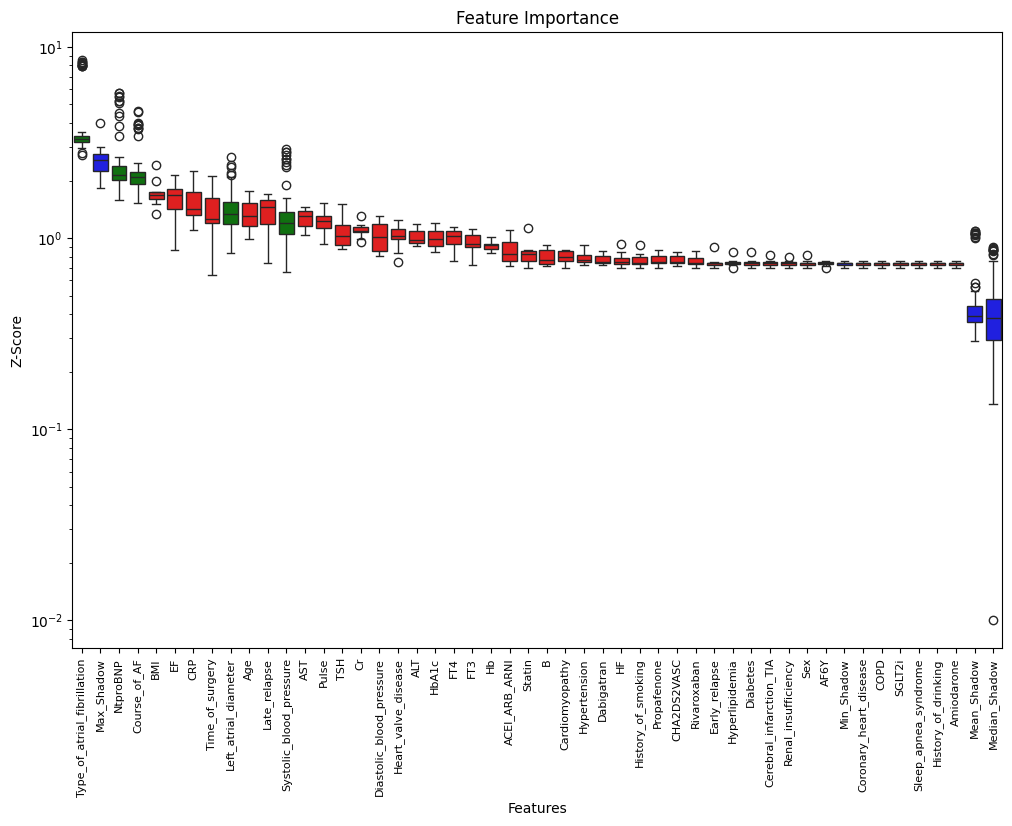

In [14]:
# 获取特征选择结果
Feature_Selector.plot(which_features='all')

用于绘制 BorutaShap 特征选择的结果，which_features='all' 表示显示所有特征，还可以选择 which_features='accepted' 仅展示被选中的重要特征，或 which_features='tentative' 仅展示待定特征

图是 BorutaShap 特征选择过程中展示的特征重要性结果，纵轴是 Z-score，横轴是各个特征。我们可以通过不同颜色的箱线图来理解特征的重要性：

- 绿色代表对模型预测结果有显著贡献的特征，这些特征被认为是重要的红色代表不重要的特征，表示这些特征对模型预测没有显著贡献
- 黄色表示待定特征（即特征的重要性不确定），它们可能会影响模型性能，但需要进一步验证，Z-score 值越高的特征，其对模型的贡献越大，越有可能被选为重要特征
- 图中还包含了影子特征（图中右侧的蓝色盒子），这些是通过随机打乱后的特征，用于与实际特征对比，判断实际特征是否比随机特征更具重要性

通过这个图，可以直观地看到每个特征在模型中的贡献，并根据颜色区分哪些特征是被保留的，哪些是被剔除的

In [15]:
# 返回具有所选特征的原始数据的子集
subset = Feature_Selector . Subset ()
subset 

,Course_of_AF,Systolic_blood_pressure,NtproBNP,Type_of_atrial_fibrillation,Left_atrial_diameter
0,12,132,550,1,4.9
1,9,97,501,1,5.0
2,24,126,889,1,5.1
3,1,112,18,0,3.6
4,8,113,764,1,5.0
...,...,...,...,...,...
251,12,130,13,0,3.5
252,12,136,3470,1,3.5
253,24,108,139,0,4.4
254,36,107,1971,1,4.6
